import file from the drive using the following code

In [2]:
from google.colab import files
uploaded = files.upload()

Saving musk_csv.csv to musk_csv.csv


doing dataframe operations using pandas library and import dataset file

In [3]:
import pandas
df=pandas.read_csv('musk_csv.csv',index_col=0)
print(df)

      molecule_name conformation_name  f1   f2  ...  f164  f165  f166  class
ID                                              ...                         
1          MUSK-211           211_1+1  46 -108  ...   -50  -112    96      1
2          MUSK-211          211_1+10  41 -188  ...   -61  -136    79      1
3          MUSK-211          211_1+11  46 -194  ...   -67  -145    39      1
4          MUSK-211          211_1+12  41 -188  ...   -60  -135    80      1
5          MUSK-211          211_1+13  41 -188  ...   -60  -135    80      1
...             ...               ...  ..  ...  ...   ...   ...   ...    ...
6594  NON-MUSK-jp13          jp13_2+5  51 -123  ...   -44  -115   118      0
6595  NON-MUSK-jp13          jp13_2+6  44 -104  ...   -66  -144    -5      0
6596  NON-MUSK-jp13          jp13_2+7  44 -102  ...   -66  -144    -6      0
6597  NON-MUSK-jp13          jp13_2+8  51 -121  ...   -44  -116   117      0
6598  NON-MUSK-jp13          jp13_2+9  51 -122  ...   -44  -115   118      0

Now we are checking if any data is missing

In [4]:
df.isnull().sum()

molecule_name        0
conformation_name    0
f1                   0
f2                   0
f3                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 169, dtype: int64

Now we are dropping the columns which are not required to analysis

In [6]:
df=df.drop(['molecule_name','conformation_name'],axis=1)
print(df)

      f1   f2   f3   f4   f5   f6  ...  f162  f163  f164  f165  f166  class
ID                                 ...                                     
1     46 -108  -60  -69 -117   49  ...   126   156   -50  -112    96      1
2     41 -188 -145   22 -117   -6  ...   136   169   -61  -136    79      1
3     46 -194 -145   28 -117   73  ...   142   165   -67  -145    39      1
4     41 -188 -145   22 -117   -7  ...   136   168   -60  -135    80      1
5     41 -188 -145   22 -117   -7  ...   137   168   -60  -135    80      1
...   ..  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...    ...
6594  51 -123  -23 -108 -117  134  ...   107   171   -44  -115   118      0
6595  44 -104  -19 -105 -117  142  ...   129   158   -66  -144    -5      0
6596  44 -102  -19 -104 -117   72  ...   130   159   -66  -144    -6      0
6597  51 -121  -23 -106 -117   63  ...   106   171   -44  -116   117      0
6598  51 -122  -23 -106 -117  190  ...   107   171   -44  -115   118      0

[6598 rows 

Now selecting feature columns and label columns

In [7]:
df_labels=df['class']
df_features=df.drop(['class'],axis=1)


In [8]:
df_labels.head()

ID
1    1
2    1
3    1
4    1
5    1
Name: class, dtype: int64

In [9]:
df_features.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,...,-27,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96
2,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,...,17,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79
3,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,...,41,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80
5,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80


Now doing normalization operation so that data is in same range of values

In [10]:
from sklearn import preprocessing
df_features=preprocessing.normalize(df_features)

Now we split the dataset into training and testing data to 80:20 ratio

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_features,
                                                 df_labels,
                                                 test_size=0.2)

In [12]:
X_train[0].shape

(166,)

Now we crate the binary model using specific layers

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
def create_model():
  model = Sequential()
  model.add(Dense(16, input_dim=166, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(1, activation='sigmoid'))
    
  adam = Adam(lr=0.001)
  model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model

model = create_model()

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                2672      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________
None


now we train the model for 50 epochs and batch size of 10

In [17]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=10)

Epoch 1/50
528/528 [==============================] - 1s 2ms/step - loss: 0.4381 - accuracy: 0.8467 - val_loss: 0.3705 - val_accuracy: 0.8379
Epoch 2/50
528/528 [==============================] - 1s 1ms/step - loss: 0.3503 - accuracy: 0.8479 - val_loss: 0.3077 - val_accuracy: 0.8379
Epoch 3/50
528/528 [==============================] - 1s 1ms/step - loss: 0.3042 - accuracy: 0.8479 - val_loss: 0.2802 - val_accuracy: 0.8379
Epoch 4/50
528/528 [==============================] - 1s 1ms/step - loss: 0.2897 - accuracy: 0.9049 - val_loss: 0.2693 - val_accuracy: 0.9295
Epoch 5/50
528/528 [==============================] - 1s 1ms/step - loss: 0.2749 - accuracy: 0.9218 - val_loss: 0.2540 - val_accuracy: 0.9333
Epoch 6/50
528/528 [==============================] - 1s 1ms/step - loss: 0.2712 - accuracy: 0.9276 - val_loss: 0.2468 - val_accuracy: 0.9379
Epoch 7/50
528/528 [==============================] - 1s 1ms/step - loss: 0.2598 - accuracy: 0.9318 - val_loss: 0.2400 - val_accuracy: 0.9326
Epoch 

Now we plot the train and validation accuracy and loss using matplotlib

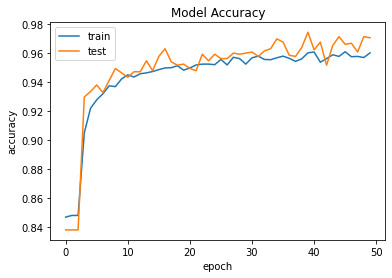

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

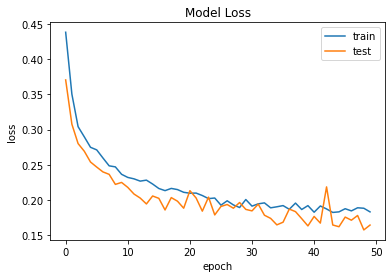

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Now we get the classification report using sklearn library and get precicion final accuracy,recall,f1-score,support.

In [24]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
pred = np.round(model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Results for Binary Model
0.9704545454545455
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1106
           1       0.91      0.91      0.91       214

    accuracy                           0.97      1320
   macro avg       0.94      0.95      0.95      1320
weighted avg       0.97      0.97      0.97      1320



In [25]:
model.save('model1.h5')

In [27]:
files.download("model1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>